# **Review of tips dataset**
## **Table of contents**
* [Introduction](#Introduction)
* [Setup](#Setup)
* [What is the tips dataset?](#What-is-the-tips-dataset?)
* [Some statistics on the dataset](#Some-statistics-on-the-dataset)
* [Description of dataset](#Description-of-dataset)
* [Skewness and kurtosis of dataset](#Skewness-and-kurtosis-of-dataset)
* [Correlation of the dataset](#Correlation-of-the-dataset)
* [Plotting statistics](#Plotting-statistics)
* [Description discussion](#Description-discussion)
* [Regression analysis: Table bill vs tips](#Regression-analysis:-Table-bill-vs-tips)
* [Best fit lines](#Best-fit-lines)
* [Regression discussion](#Regression-discussion)
* [Some other analysis](#Some-other-analysis)
* [Selection of new criteria for analysis](#Selection_of_new_criteria_for_analysis)
* [New data set descriptions](New_data_set_descriptions)
* [Discussion of new data set](Discussion_of_new_data_set)
* [General regression analysis for new data set](General_regression_analysis_for_new_data_set)

*[Bibliography](#Bibliography)

## **Introduction**
In this notebook, it is intended to review the tips dataset, which can be found online. To do this, a number of approaches will be taken. The first step will be to review the data using standard descriptive statistics, such as mean, mode, median, quartile ranges, standard deviation, etc. Other information will also be gleaned, such as the skewness, and kurtosis of the data (this will be explained in the relevant section), as well as correlation and covariance between certain data sets.

A second step will be to conduct some analysis between the fields of total-bill and tip, to determine a relationship. This analysis will also include both a best fit, and a mean fit lines. These lines can be used for various reasons, and will be discussed in the regression analysis section.

The third section, two subsets of the data will be extricated from the data, and compared to each other. The two subsets of the data chosen for this analysis are the time that the diner at the location, as well as whether the diner was a smoker or not. Similar analysis will conducted with regards to these two data sets, as was conducted on the overall dataset. A discussion of the results can be found in the discussion of further analysis section.

A final section covers other potential analysis that could be undertaken, using the same dataset.

The tips dataset that was used in the below was sourced from [here](http://https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv). Note the data here is the raw form, to make it easier to import into our code.

*Note: in this text, a number of ideas, or explanations may be mentioned. These have all been sourced either from the works listed in the bibliography, or from the author’s own ideas. For the sake of legibility, unless a direct quote, comparison, or specific suggestion is used, it will not be cited in the standard academic (Harvard) manner.
### Setup
Before running any analysis of the data, it is necessary to import the data, and the libraries that we will be using. In this case, it is intended to import the following libraries:
- **Numpy**: To run some functions for analysis.
- **Pandas**: The dataset will be held in various pandas dataframes. The pandas library will also be used to conduct various analytical exercises.
- **Seaborn**: Will be used for various plotting functionality.
- **Matplotlib.pyplot**: For use in some graphing functionality.

Additionally, throughout this notebook, the main dataframe that will hold the dataset will be called *tips_ds*. The below code is used to import the libraries and dataset.

In [140]:
# Initial setup of tips dataset

# Importation of libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load tips dataset

# Source URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"

# Creation of tips_ds dataframe
tips_ds = pd.read_csv(url)

It should be noted that the above code does not have any outputs. The confirmation that the code was successfully imported can be found at the end of [What is the tips dataset?](#What-is-the-tips-dataset?) (below).

## **What is the tips dataset?**
The tips dataset is a set of data that is often used to teach analytical skills, especially around the segregation of data, and analysis of a group, or a whole set. Additionally, it could be used for extrapolation of data, where the data in question is not included in the actual dataset. The data forms part of a tutorial for the Python Seaborn package, and is used to demonstrate how to conduct plotting of data in Python.

This information that was recorded fell into 7 different columns. These were:
- **total-bill**: the total bill for each meal (numerical values to two decimal places).
- **tip**: the tip received for each meal (numerical values to two decimal places).
- **sex**: gender of the table (either male or female. Doesn’t note if this was the gender of the payer, but would be safe to assume so).
- **smoker**: whether the table being served was in a smoking or non-smoking section (this was California in the 1990s after all)
- **day**: day of the week that the meal was being served. Covers only Thursday to Sunday.
- **time**: the time of day that the service was being conducted. Broken down as either lunch or dinner service.
- **size**: the number of people in the party (whole numerical value).
In total the collector made 244 entries into the dataset.

All the above data can be confirmed by Python.

In [141]:
# Confirmations
print()
print("Confirmation of tips dataset shape, and types")
print()
print("Rows,", "Cols")
print(tips_ds.shape)
print()
print("Data types")
print(tips_ds.dtypes)


Confirmation of tips dataset shape, and types

Rows, Cols
(244, 7)

Data types
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


***
## **Some statistics on the dataset**
In order to be able to work with the dataset, and draw any conclusions from the data, it is important to determine some of the dataset’s properties. In order to do this, we will extract basic measures, more commonly known as descriptive statistics. These statistics can then be used as a guide to further analysis, and comparison. 
#### Description of dataset
The initial set of descriptive statistics are the mean, mode, and median of the data, as well as standard deviation, quartiles, and min and max values. Luckily, pandas has the ability to provide the values for most of these statistics, using the *describe* function. However, while this is useful, it is also necessary to understand what the terms provided by the *describe* function actually mean.
- **Mean**: Also known as the simple average, is the sum of all the values divided by the number of values being summed.
- **Standard deviation**: A measure of how are a number is from the mean. In a perfectly normal distribution, ~68% of all values would be within 1 standard deviation of the mean. Represented in the *describe* output as *std*.
- **min**: The lowest value within the dataset.
- **25%**: The value for the 25th percentile. In other words, 25% of all the values in the dataset are below this value.
- **50%**: The value for the 50% percentile. In other words, 50% of all the values in the dataset are below this value. This value is often called the median value.
- **75%**: The value for the 75th percentile. In other words, 75% of all the values in the dataset are below this value.
- **Max**: The largest value in the dataset.

The values for the tips dataset are retrieved as follows:

In [142]:
# Describe function for the tips dataset
print()
print("Descriptions of the tips dataset")
print()
print(tips_ds.describe())


Descriptions of the tips dataset

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


As we can see, certain measures from the descriptive statistics such as mode, skewness, and kurtosis are missing from the *describe* functionality. These statistics also give rise to important information regarding the dataset. The [skewness and kurtosis](#Skewness-and-kurtosis-of-new-datasets) will be dealt with in their respective section. This leaves the mode to be ascertained. 

The mode of a set of numbers, is the number that appears most often within that set. It is not necessarily close to the median or mean of a dataset, and can be well outside the 1st standard deviation of the data (this can happen when the distribution of the data is skewed). If no number appears most often (i.e. no number appears more often than any other number), then there is no mode for the data. Additionally, unlike the mean, and median statistics, which need to have numbers to work, the *mode* function can work on any set of data.

Using pandas, the mode can be determined using the *mode* function.

In [143]:
# Mode function for the tips dataset
print()
print("Mode for the tips dataset")
print()
print(tips_ds.mode())


Mode for the tips dataset

   total_bill  tip   sex smoker  day    time  size
0       13.42  2.0  Male     No  Sat  Dinner     2


The *describe* function only returns data for numerical fields, while the *mode* function included information on the mode of the columns that contained string. The *describe* function can be used to provide some descriptive statistics on the data in the non-numerical columns. This is done by the inclusion of the *include=[np.object]* argument in the *describe* function. In addition to the statistics returned in the original extract, the following statistics are provided:

- **Unique**: The number of unique values to be found in the column.
- **Top**: The value returned most frequently in the column. Should return the same value as the *mode* function.
- **Freq**: The frequency of the most commonly returned value from top/mode.

Using this *describe(include=[np.object])* function, the following values are returned for the tips dataset.

In [144]:
# Describe(include=[np.object]) function for the tips dataset

print()
print("Descriptive statistics for the non-numerical columns")
print()
print(tips_ds.describe(include=[np.object]))


Descriptive statistics for the non-numerical columns

         sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176


As we can see the *describe(include=[np.object])* functionality provides additional clarity to the *mode* function for the dataframe.
#### Skewness and kurtosis of new datasets

The skewness and kurtosis are interrelated terms that are used to describe the nature of the distribution of the dataset, and how it differs from a normally distributed dataset. The definition of these terms are:
- **Skewness**: the direction and amount of asymmetry of the dataset about its mean. If the absolute value of the skewness is:
> - greater than 1, the data is highly skewed and the distribution is very asymmetric.
> - greater than 0.5 and less than 1, the data is moderately skewed, and the distribution is somewhat asymmetric.
> - greater than 0, and less than 0.5, the distribution of the data is approximately symmetric.
> - equal to 0, the data is normally distributed, and symmetric.

The sign of the skewness (i.e. positive or negative) also determines the skewness. Negative skewness indicates that the distribution is skewed to the left, the mean being less than the median, which is less than the mode. Positive values of skewness indicate the opposite, with the distribution being skewed to the right, and the mode being less than the median, which is less than the mean.
- **Kurtosis**: the kurtosis of a dataset indicates the sharpness, or flatness, of the peak of the data (around the mode, or mean, depending on the skewness). 

The kurtosis is measure against the normal distribution, which has a kurtosis of 0. If the kurtosis is negative, then distribution of the data has a smaller standard deviation, as more values are grouped near the mean. This gives the distribution a sharper, and higher peak, and narrower body. A positive kurtosis indicates that there is less grouping around the mean, and indicating that the distribution has a larger standard deviation. This also gives the distribution a flatter, and lower peak, and a wider body.

In pandas, the skewness and kurtosis of a dataset can be ascertained using the *skew* and *kurt* functions. These functions return values for each numeric column within the data set.

In [145]:
# Skewness and kurtosis of the dataframe
print()
print("Skewness")
print("Total bill: %1.5f" % tips_ds["total_bill"].skew())
print("Tips: %13.5f" % tips_ds["tip"].skew())
print("Size: %13.5f" % tips_ds["size"].skew())
print()
print("Kurtosis")
print("Total bill: %1.5f" % tips_ds["total_bill"].kurt())
print("Tips: %13.5f" % tips_ds["tip"].kurt())
print("Size: %13.5f" % tips_ds["size"].kurt())


Skewness
Total bill: 1.13321
Tips:       1.46545
Size:       1.44788

Kurtosis
Total bill: 1.21848
Tips:       3.64838
Size:       1.73170


#### Correlation
Correlation is a statistic that can be used to measure how well two sets of data correspond to each other. Weisstein (2019) defines correlation as *“the degree to which two or more quantities are linearly associated.* As such, a correlation coefficient can be calculated that shows the relationship between the two sets of variables, as well strength of the relationship.

In correlation analysis, positive values show that the two sets of data are positively correlated (i.e. as one value rises or falls, so does the other). Conversely, negative values indicate that the two data sets are negatively or inversely correlated (i.e. as one value rises, or falls, the other falls, or rises). A zero value indicates that there is no relationship between the two sets of data. The strength of the relationship is indicated be the actual value of the correlation coefficient. An absolute value above 0.5 is considered a strong correlation, and above 0.75 is a very strong correlation. A value of -1 or 1 means that the two sets of data are perfectly correlated (i.e. either perfectly positive or perfectly negative correlation).

In pandas dataframes, the *corr* function can be used to ascertain the correlation between numeric sets of data.

In [146]:
# Correlation analysis fot the tips dataset
print()
print("Correlation coefficient for the tips dataset")
print()

# Create new dataframe for the correlation coefficient values
tips_corr_ds = tips_ds.corr(method="pearson")

# As each column will be perfectly correlated with itself, there is no need to show these values
# Replace the values of 1 with a blank value
tips_corr_ds = tips_corr_ds.replace({1.00000: ""})

# Print the new dataframe to show the correlation coefficients of the tips dataset
print(tips_corr_ds)


Correlation coefficient for the tips dataset

           total_bill       tip      size
total_bill             0.675734  0.598315
tip          0.675734            0.489299
size         0.598315  0.489299          


As there are 3 sets of numeric data, the correlation gives a 3x3 grid of data (with the diagonal self-correlation coefficient blanked out).
#### Plotting statistics
Before a discussion of the statistics that were determined, it is useful to plot some of the statistics determined. In this case, it would be useful to plot the *total_bill* and *tip* columns, which will show the skewness of the distribution. 


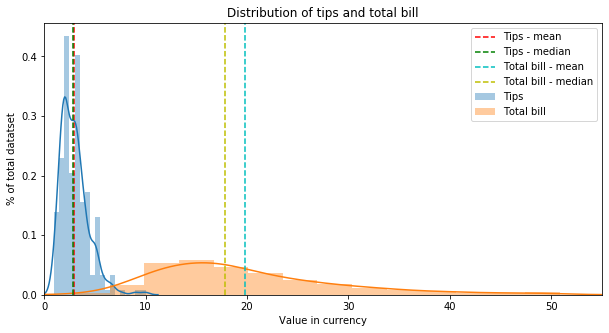

In [147]:
# Plot of distribution of tip and total bill data

# For total bill, new values for mean and median values
tb_mean = tips_ds["total_bill"].mean()
tb_median = tips_ds["total_bill"].median()
tb_mode = tips_ds["total_bill"].mode()

# For tip, new values for mean and median values
t_mean = tips_ds["tip"].mean()
t_median = tips_ds["tip"].median()
t_mode = tips_ds["tip"].mode()

# Seaborn distplots showing both histograms and bell curves for tips and total bill
sns.distplot(tips_ds["tip"], axlabel = False, label="Tips")
sns.distplot(tips_ds["total_bill"], axlabel = False, label="Total bill")

# Plotlines for tips of mean and median
plt.axvline(t_mean, color = 'r', linestyle = "--", label = "Tips - mean")
plt.axvline(t_median, color = 'g', linestyle = "--", label = "Tips - median")

# Plotlines for total bill of mean and median
plt.axvline(tb_mean, color = 'c', linestyle = "--", label = "Total bill - mean")
plt.axvline(tb_median, color = 'y', linestyle = "--", label = "Total bill - median")

# Set limit of x-axis from to 55
plt.xlim([0,55])

# Set size of plot area
plt.rcParams["figure.figsize"] = [15,5]

# Set title, labels, and legend
plt.title("Distribution of tips and total bill")
plt.xlabel("Value in currency")
plt.ylabel("% of total datatset")
plt.legend()

# Show plot
plt.show()

#### Description discussion
The descriptive statistics for the *tip* dataset give a fair detail with regards to the data. 
##### Correlation
If we work in reverse order of statistics provided, we can see the relationship between the *total_bill* and tip values. The correlation value is 0.676, which is in the upper 1/3 of the strong correlation. It is also positive. This suggests that there is a strong relationship between the size of the bill and the tip. There is also a strong relationship between the *total_bill*, and the size of the party. Both of these are to expected, as generally, the larger the party, the larger the bill.

There is, however, a medium to strong relationship between the size of the party, and the left. This is somewhat surprising, as *tip* in the USA are generally a fixed percentage of the bill. This could indicate that the larger the party, the less generous the tipper felt. However, it should be cautioned that a large party leaving a small tip could affect this outcome. The removal of the outliers for the party size (75% of parties were 3 people or less, while the largest was 6 people) could increase this correlation.
##### Skewness and Kurtosis
Looking first at the kurtosis, the value of 3.65 for the tip data set suggest that there will be a distribution with sharp peak, and narrow body, with few outliers, when plotted. By contrast, the kurtosis for the *total_bill* is given as 1.22. This suggests a more humped distribution, with a low, smooth peak, and a wide body, with numerous returns in the tails to either side. The plot of both the *total_bill* and tip values shows that the kurtosis expectations are met. 

Visually, it can be seen that both plots are skewed to the right, with the mean greater than the median. This is as expected, and is confirmed by the returned values for mean, mode, and median, that were calculated in the first section of the statistics.

To note: it is somewhat difficult to distinguish between the mean and median for the *tip* data, as they are very close. However, when splitting out the *tip* data, and plotting separately, they can clearly be seen.

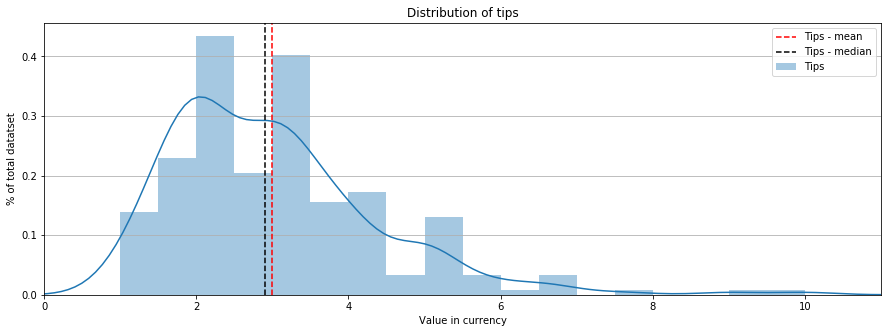

Mean > median > mode for tip data
Mean:   2.998
Median: 2.900
Mode:   2.000


In [148]:
# Plot of distribution of tip data

# Seaborn distplots showing both histograms and bell curves for tips
sns.distplot(tips_ds["tip"], axlabel = False, label="Tips")

# Plotlines for tips of mean and median
plt.axvline(t_mean, color = 'r', linestyle = "--", label = "Tips - mean")
plt.axvline(t_median, color = 'k', linestyle = "--", label = "Tips - median")

# Set limit of x-axis from 0 to 11
plt.xlim([0,11])

# Set size of plot area
plt.rcParams["figure.figsize"] = [15,5]

# Show title gridlines, legend, title, and show plot
plt.grid(axis="y")
plt.title("Distribution of tips")
plt.xlabel("Value in currency")
plt.ylabel("% of total datatset")
plt.legend()
plt.show()

# Mean, median, and mode values for the tip data
print("Mean > median > mode for tip data")
print("Mean: %7.3f" % tips_ds["tip"].mean())
print("Median: %1.3f" % tips_ds["tip"].median())
print("Mode: %7.3f" % tips_ds["tip"].mode())

Combining the same vairables for the *total_bill* set of data, with a plot gives clearer results as well.

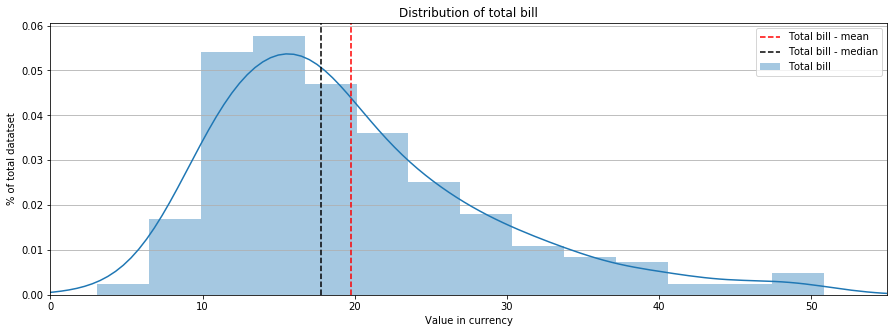

Mean > median > mode for tip data
Mean:   19.786
Median: 17.795
Mode:   13.420


In [149]:
# Plot of distribution total bill data

# For total bill, new values for mean and median values
tb_mean = tips_ds["total_bill"].mean()
tb_median = tips_ds["total_bill"].median()
tb_mode = tips_ds["total_bill"].mode()

# Seaborn distplots showing both histograms and bell curves for total bill
sns.distplot(tips_ds["total_bill"], axlabel = False, label="Total bill")

# Plotlines for total bill of mean and median
plt.axvline(tb_mean, color = 'r', linestyle = "--", label = "Total bill - mean")
plt.axvline(tb_median, color = 'k', linestyle = "--", label = "Total bill - median")

# Set limit of x-axis from to 55
plt.xlim([0,55])

# Set size of plot area
plt.rcParams["figure.figsize"] = [15,5]

# Show title gridlines, legend, title, and show plot
plt.grid(axis="y")
plt.title("Distribution of total bill")
plt.xlabel("Value in currency")
plt.ylabel("% of total datatset")
plt.legend()
plt.show()

# Mean, median, and mode values for the tiotal_bill data
print("Mean > median > mode for tip data")
print("Mean: %8.3f" % tips_ds["total_bill"].mean())
print("Median: %1.3f" % tips_ds["total_bill"].median())
print("Mode: %8.3f" % tips_ds["total_bill"].mode())

##### Standard deviation and quartiles
Once again looking at the *tip* and *total_bill* sets of data, the initial descriptive statistics gave a standard deviation of 8.9 and 1.34 respectively. This would indicate that that ~68% of all the  data points for these two data sets would fall into a range of the mean less the standard deviation to the mean + the standard deviation. This can be checked using the following script.

In [150]:
# Check if standard deviation is correct for tips and total_bill sets of data

# Total bill
# Create new dataframe for total bill only
tb_only = tips_ds["total_bill"]

# Determine the lower and upper bounds for the 1st standard deviation
STD_lower = tb_only.mean() - tb_only.std()
STD_upper = tb_only.mean() + tb_only.std()

# Apply the lower and upper std bounds to filter the total bill dataframe
tb_std_range = tb_only.loc[(tb_only >= STD_lower) & (tb_only <= STD_upper)]

# Tip
# Create a new dataframe for tip only
t_only = tips_ds["tip"]

# Determine the lower and upper bounds for the 1st standard deviation
STD_lower = t_only.mean() - t_only.std()
STD_upper = t_only.mean() + t_only.std()

# Apply the lower and upper std bounds to filter the tip dataframe
t_std_range = t_only.loc[(t_only >= STD_lower) & (t_only <= STD_upper)]

# Print the results
print("Total bill set of data")
print("-----------------------")
print("Lower range of 1st standard deviation: %21.2f" % STD_lower)
print("Upper range of 1st standard deviation: %21.2f" % STD_upper)

# Count the length of the filtered total bill dataframe
# and divide by the length of the unfiltered total bill dataframe
# to get a percentage of results within the 1st standard deviation +/- from the mean
print("No. of results within the lower to upper st.dev range %5.0f" % len(tb_std_range))
print("Percent of results compared to the total %20.2f" % ((len(tb_std_range)/len(tb_only))*100))
print()

# Print the results
print("Tip set of data")
print("-----------------------")
print("Lower range of 1st standard deviation: %21.2f" % STD_lower)
print("Upper range of 1st standard deviation: %21.2f" % STD_upper)

# Count the length of the filtered total bill dataframe
# and divide by the length of the unfiltered total bill dataframe
# to get a percentage of results within the 1st standard deviation +/- from the meanprint("No. of results within the lower to upper st.dev range %5.0f" % len(t_std_range))
print("No. of results within the lower to upper st.dev range %5.0f" % len(tb_std_range))
print("Percent of results compared to the total %20.2f" % ((len(t_std_range)/len(t_only))*100))

Total bill set of data
-----------------------
Lower range of 1st standard deviation:                  1.61
Upper range of 1st standard deviation:                  4.38
No. of results within the lower to upper st.dev range   176
Percent of results compared to the total                72.13

Tip set of data
-----------------------
Lower range of 1st standard deviation:                  1.61
Upper range of 1st standard deviation:                  4.38
No. of results within the lower to upper st.dev range   176
Percent of results compared to the total                74.59


Based on the results above, we can see that for both the *total-bill* and *tip* sets of data, the % of results that fall into the first standard deviation either side of the mean is, respectively, ~4% and ~6.5% greater than expected. This indicates that something is either wrong with the standard deviation or the data in the dataset. However, Smith (2016) notes that the standard deviation should only be used in conjunction with the normal distribution, as using it with asymmetric data will give false results. As we know from the above plots and skewness calculations, the data in the data set is not normally distributed, and is highly asymmetric. This accounts for the larger than expected size of the data, when using the lower and upper bounds of standard deviation.

Smith (2016) suggests that instead of standard deviation for skewed distributions, it is better to examine the quartiles. The quartiles, unlike the standard deviation, show the values where the  data set can be broken into 4 even segments (i.e. 1st, 2nd, 3rd, and 4th segments), so that each segment has the same number of results in it. As there are 244 results in the data set, this would suggest that the quartiles contain 61 (244/4) results in each section. Additionally, the range between the upper bound of the 1st and 3rd boundaries is called the interquartile range, and contains 50% of all the values in the set. While this may sound intuitive, it does allow a method to determine the 50% of the data set that are surrounding the median value (which is the upper bound of the 2nd quartile). This allows for a filter to be applied to the data, and can help reduce the impact of outliers on some of the statistics relating to the data.

Looking at a modified table of the initial statistics below, we can see how outliers can impact the median, mean, and mode of the data set. 

In [151]:
# Modified statistics for tip and total_bill data

# Total_bill data

print("Total_bill data".ljust(40) + "Tip data")
print("--------------------------------------------------")
print("Min: %20.2f %21.2f" % (tb_only.min(), t_only.min()))
print("0.25 quartile: %11.2f %20.2f" % (np.percentile(tb_only, 25), np.percentile(t_only, 25)))
print("0.50 quartile: %11.2f %20.2f" % (np.percentile(tb_only, 50), np.percentile(t_only, 50)))
print("0.75 quartile: %11.2f %20.2f" % (np.percentile(tb_only, 75), np.percentile(t_only, 75)))
print("Max: %21.2f %21.2f" % (tb_only.max(), t_only.max()))
print("Interquartile range: %1.2f %20.2f" % ((np.percentile(tb_only, 75) - np.percentile(tb_only, 25)), (np.percentile(t_only, 75) - np.percentile(t_only, 25))))

Total_bill data                         Tip data
--------------------------------------------------
Min:                 3.07                  1.00
0.25 quartile:       13.35                 2.00
0.50 quartile:       17.80                 2.90
0.75 quartile:       24.13                 3.56
Max:                 50.81                 10.00
Interquartile range: 10.78                 1.56


As can be seen from both sets of data, the maximum value for is considerably larger than the median (50% quartile) value. In the *total_bill* set of data, it the max value is nearly twice the median value plus the 75% quartile value. In the *tip* data set, the gap between the 75% quartile value and the max value is more than twice the median value. It is also worthwhile noting that the value for the interquartile range is 21.2% and 15.6% respectively of the max value. This confirms the data from the histograms in the plots above, which showed clustering around the median.
##### Other data
The non-numerical data has not been looked at closely, due to the fact that there is little manipulation that can be done with it. However, it does show some interesting results that may be useful for further analysis.

In looking at the returns for the non-numerical values, we can see that the number of records where men (157/244 = 64.3%), non-smoking (61.89%), dinner (72.1%) form the majority of entries in their respective sets of data. While eating on a Saturday only accounts for 35.66% of entries, it is the largest set of days recorded. This suggests that while not easily manipulable, in the same way as numerical data, they do present viable filters to be used in further analysis.

Additionally, the *size* of the party being served has not been examined closely, except for the correlation values. This is due, in part, to the small range of the values (1 – 6 people per record), and the fact that 25% quartile is the same as the median value, and 75% of the data is between 1 – 3 people. While its kurtosis is not as dramatic as the *tip* set of data, its skewness is almost the same. This suggests that the *size* set of data would have a reasonably smooth peak, similar to the *total_bill” set of data, but that it is almost as right skewed and asymmetrical as the *tip* data set.
##### Conclusion of descriptive statistics
While it is difficult to draw too many conclusions from the initial set of statistics, some answers can be drawn. The data, in both cases, is asymmetric, and positively skewed, as demonstrated by many of the statistics identified. Due to this, such data as the standard deviation is not useful, and should be disregarded. Additionally, in both cases, there are large values in the tails of the data set which influence the descriptive statistics of the data, such as the mean. 

In order to gain some perspective on the actual information in the data, it may be necessary to remove any value outside of the median, +/- 1.5 x the interquartile range. Another approach would be to include the non-numerical columns as filters, so that each day, service session, gender, or smoking, to the dataset and compare the results. It may be possible to determine if there is a set of patrons that is generally more generous with the tips being given out, or if the gender, or smoking habits affects the tip percentage. These could all be determined in a later stage of this document.
***

## **Regression analysis: Table bill vs tips**
As noted above there is a clear correlation between the between the *total_bill* and *tip* sets of data. However, a cursory glance at the top and bottom values for each data set shows that the relationship is not the same for each entry (i.e. the tip is not the same percentage of the bill in each case). This can be seen below.

In [152]:
# Check the total_bill, tip, and percentage_tip with highest/lowest values

# Create a new dataframe for the regression analysis
# Drop the smoker, sex, size, time, and day columns
regression_ds = tips_ds.drop(columns = ["smoker", "sex", "size", "time", "day"])

# Add a new calculated column for percentage_tip
regression_ds["percentage_tip"] = round(regression_ds["tip"] / regression_ds["total_bill"], 4)

# 3 largest and smallest values for total_bill
print("3 largest values for total_bill")
print(regression_ds.nlargest(3,"total_bill"))
print()
print("3 smallest values for total_bill")
print(regression_ds.nsmallest(3,"total_bill"))
print("---------------------------------------")

# 3 largest and smallest values for tip
print()
print("3 largest values for tip")
print(regression_ds.nlargest(3, "tip"))
print()
print("3 smallest values for tip")
print(regression_ds.nsmallest(3, "tip"))
print("---------------------------------------")

# 3 largest and smallest values for tip
print()
print("3 largest values for percentage_tip")
print(regression_ds.nlargest(3, "percentage_tip"))
print()
print("3 smallest values for percentage_tip")
print(regression_ds.nsmallest(3, "percentage_tip"))
print("---------------------------------------")

3 largest values for total_bill
     total_bill    tip  percentage_tip
170       50.81  10.00          0.1968
212       48.33   9.00          0.1862
59        48.27   6.73          0.1394

3 smallest values for total_bill
     total_bill  tip  percentage_tip
67         3.07  1.0          0.3257
92         5.75  1.0          0.1739
111        7.25  1.0          0.1379
---------------------------------------

3 largest values for tip
     total_bill    tip  percentage_tip
170       50.81  10.00          0.1968
212       48.33   9.00          0.1862
23        39.42   7.58          0.1923

3 smallest values for tip
     total_bill  tip  percentage_tip
67         3.07  1.0          0.3257
92         5.75  1.0          0.1739
111        7.25  1.0          0.1379
---------------------------------------

3 largest values for percentage_tip
     total_bill   tip  percentage_tip
172        7.25  5.15          0.7103
178        9.60  4.00          0.4167
67         3.07  1.00          0.3257

3 s

As we can see from the values above, for the top/bottom three values in each category, there are some overlaps. Row 170 has the highest *total_bill* and *tip*, but does not have the highest *percentage_tip*. Row 67 appears in all three sets information, being the lowest value in *total_bill*, the joint lowest value in *tip*, but the third highest value in *percentage_tip*. It should also be noted the rows with lowest values in for *total_bill* are the same rows for lowest *tip*.

There is no clear and obvious relationship between the *total_bill* and *tip*, using the highest and lowest values. Therefore, it may be possible to determine a relationship visually, using a graph. A scatter graph, with the values plotted against each other would give an indication of a relationship.

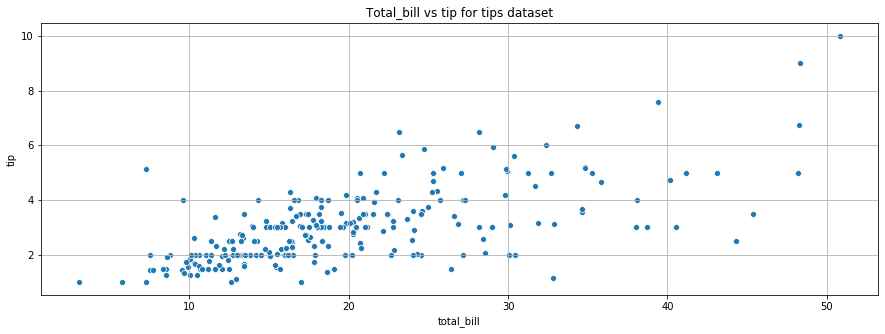

In [153]:
# Plot total_bill vs tip for tips datase

# Create scatter plot diagram
sns.scatterplot(x="total_bill", y="tip", data=regression_ds)

# Show title gridlines, title, and show plot
plt.grid(axis="both")
plt.title("Total_bill vs tip for tips dataset")
plt.show()

On visual inspection, it looks like there could be a general linear pattern, from the point [10, 1] toward the point [50, 8]. This line would seem to be reasonably tight between the 10 – 20  marks on the x-axis, but spreading out more widely from the 25 mark on the x-axis. However, this analysis would not be exact, and is only an impression based on visual observation.
#### Best fit lines
A better way to determine any relationship between the *total_bill* and *tip* value would be to run a calculation that could calculate a line that would “fit” between all the values. IT is possible that we could take the highest and lowest points (as found above), and draw a line that connects them both). Alternatively, it may be possible to use the second or third highest and lowest points, and draw a line between them. However, these lines would all have different slopes, and different formulae.

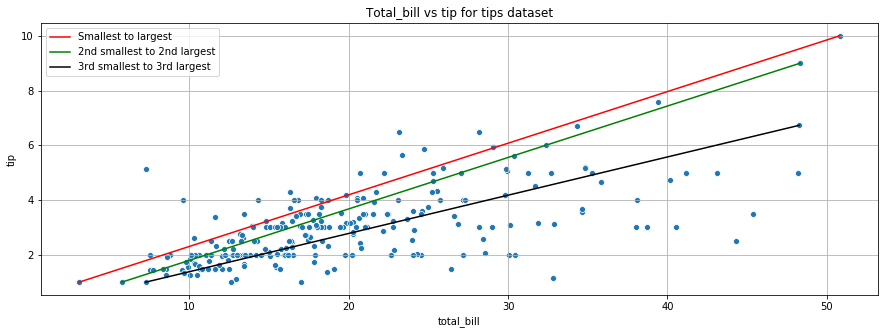

Slope line 1: 0.1807
Slope line 2: 0.1879
Slope line 3: 0.1397


In [154]:
# Various best fit plot lines and slopes

# Create scatter plot diagram
sns.scatterplot(x="total_bill", y="tip", data=regression_ds)

# Draw lines connecting smallest and largest total-bill values
plt.plot([50.81, 3.07], [10.00, 1.00], "r-", label = "Smallest to largest")
plt.plot([48.33, 5.75], [9.00, 1.00], "g-", label = "2nd smallest to 2nd largest")
plt.plot([48.27, 7.25], [6.73, 1.00], "k-", label = "3rd smallest to 3rd largest")

# Show title gridlines, legend, title, and show plot
plt.grid(axis="both")
plt.title("Total_bill vs tip for tips dataset")
plt.legend()
plt.show()

# Calculate slopes of lines
slope_1 = (1 - 10) / (1 - 50.81)
slope_2 = (1 - 9) / (5.75 - 48.33)
slope_3 = (1 - 6.73) / (7.25 - 48.27)

print("Slope line 1: %1.4f" % slope_1)
print("Slope line 2: %1.4f" % slope_2)
print("Slope line 3: %1.4f" % slope_3)

Surely not all the lines can be right?

There are a number of methods of determining the best fit line. Seaborn and Numpy both have methods of calculating best fit lines. For Seaborn two methods are *regplot()* and *lmplot()*. *regplot()* is a simple linear regression model, while *lmplot()* combines *regplot()* and *FaceGrid* functionalities. Numpy uses *polyfit()* which is a *”least squares polynomial”* regression method (SciPy.org, 2019). As Waskom (2018) notes that *regplot()* and *lmplot()* return the same data, there is no need to plot them together. Likewise, *polyfit()*, and *regplot()” return identical regression lines.

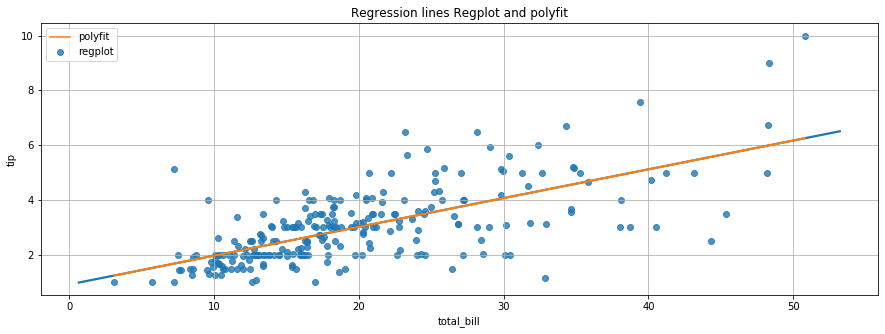

In [155]:
# Plot total_bill, tips, and the regression lines from polyfit and regplot

# Create regplot best fit line
sns.regplot(x="total_bill", y="tip", data=regression_ds, ci = None, label = "regplot")

# Create the polyfit best fit line
# This method is borrowed from Chubarov (2017)

# Create X and Y values
xs = regression_ds["total_bill"]
ys = regression_ds["tip"]

# Create trendline using polyfit
trend = np.polyfit(xs,ys,1)

# Plot the trendline
trendpoly = np.poly1d(trend) 
plt.plot(xs,trendpoly(xs), label = "polyfit")

# Change shape of plotting area, gridlines and show plot
plt.grid(axis="both")
plt.rcParams["figure.figsize"] = [10, 5]
plt.legend()
plt.title("Regression lines Regplot and polyfit")
plt.show()

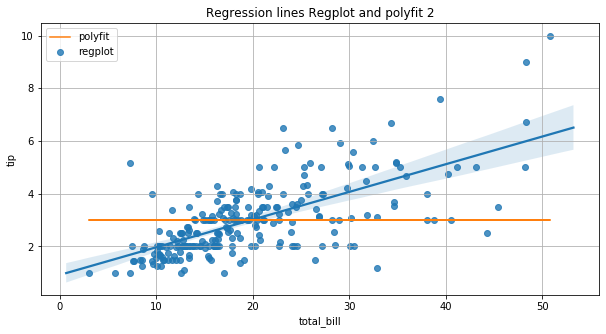

In [156]:
# Plot total_bill, tips, and the regression lines from polyfit and regplot
# Values of CI (regplot) and degreest of fit (polytfit) have been changed

# Create regplot best fit line
sns.regplot(x="total_bill", y="tip", data=regression_ds, ci = 95, label = "regplot")

# Create the polyfit best fit line
# This method is borrowed from Chubarov (2017)

# Create X and Y values
xs = regression_ds["total_bill"]
ys = regression_ds["tip"]

# Create trendline using polyfit
trend_1 = np.polyfit(xs,ys,0)

# Plot the trendline
trendpoly = np.poly1d(trend_1) 
plt.plot(xs,trendpoly(xs), label = "polyfit")

# Change shape of plotting area, gridlines and show plot
plt.grid(axis="both")
plt.rcParams["figure.figsize"] = [10, 5]
plt.legend()
plt.title("Regression lines Regplot and polyfit 2")
plt.show()

If the degrees of fit are changed on *polytfit()* from 1 to 0, and the *ci* value in *replot()* is switched on, and set to 95, more pronounced differences can be seen. (Note: this is only to show the differences in the functions).

#### Regression discussion
As we can see from the regression lines there is a distinct relationship between the values in the *total_bill* and the *tip* sets of data. While the correlation analysis performed earlier shows the extent to which the two values move in conjunction, the regression analysis shows how the value of *total_bill* impacts the value of *tip*.

The formula for a line is given as *y = mx + c*, where y is the expect value of the dependent variable, in our case *tip*; m is the slope of the line, as well as the modifier for the plotted variable (*total_bill*), while is an independent modifier for the formula. Using the value derived in from the *polyfit()* function, we can determine the formula for the line of regression.


In [157]:
# Print line of regression formula using polyfit

# Take the values of m and c from the trend calculated previously
m, c = trend

# Input the values for m and c into the formula of the ine
print("Formula for regression line is:")
print()
print("y = %0.4fx + %0.4f" % (m, c))

Formula for regression line is:

y = 0.1050x + 0.9203


As we can see the slope of the line is 0.105, which is a positive number. This is confirmed by visual inspection of the graph. What this means is that there is a positive association between the *total_bill* values, and the *tip* values, and as one increases, the other is expected to as well. Additionally, we can see the lines that were plotted earlier, using the smallest and largest points were correctly aligned, however, the slopes were off by about 40% for the closest line.

Regression analysis, especially in statistics, can used to determine unknown variables, based on a known variable. In this case, it should be possible to determine, using the formula for the regression line, what the value of a tip would be, if the value of the bill was known. This could be shown using random variables, and plotting them on the graph. 


In [158]:
# Examples of regression using formula of regression line

print("Extrapolation of tips (y) from table bill amounts (x)")
print()

# Using 4 values of x
x = 9.00
y = m*x + c
print("For x: %2.2f, the value of y is: %5.2f" % (x, y))

x = 32.40
y = m*x + c
print("For x: %2.2f, the value of y is: %2.2f" % (x, y))

x = 18.45
y = m*x + c
print("For x: %2.2f, the value of y is: %2.2f" % (x, y))

x = 75.20
y = m*x + c
print("For x: %2.2f, the value of y is: %2.2f" % (x, y))

Extrapolation of tips (y) from table bill amounts (x)

For x: 9.00, the value of y is:  1.87
For x: 32.40, the value of y is: 4.32
For x: 18.45, the value of y is: 2.86
For x: 75.20, the value of y is: 8.82


It should be noted that as the values in the *total_bill* data set grew larger, their distance from the line of regression also increased. This would suggest that while the regression line is useful for calculating the tip for bills between 9.00 and 30.00, actual tip values outside this range might differ considerably from what has been calculated. This is evident, as the highest values for *total_bill* (50.81, 48.37, 48.33) produced tips of 10.00, 9.00, and 6.73, while the extrapolated tip amount for a bill of 75.20 is only 8.82.

As we can see, the regression analysis providers users of the tips dataset the there is a clear relationship between the *total_bill* and the *tip* set of data. Additionally, it shows that the relationship is positive (i.e. as the value of the bill goes up, so does the value of the tip). 
***

## **Some other analysis**
When doing data analysis, there is often more than one influencer on any given data point. In the *tips* dataset, there are 7 different set of data, all of which are interconnected. Each of *size*, *time*, *day*, *smoker* will have an impact on both the value of a table’s bill, and the tip left for the server. Additionally, the *total_bill* will also impact on the *tip* value, as already noted above. As such, there is scope to determine whether any of these other data sets impacts the value of *total_bill*, and the *tip*. 

Looking at the initial statistical data gathered, it is worthwhile noting again that the data is skewed for all three numerical sets of data. This should also be taken into account when conducting any testing. 

In [159]:
# Skewness and kurtosis of the dataframe
print()
print("Skewness")
print("Total bill: %1.5f" % tips_ds["total_bill"].skew())
print("Tips: %13.5f" % tips_ds["tip"].skew())
print("Size: %13.5f" % tips_ds["size"].skew())
print()
print("Kurtosis")
print("Total bill: %1.5f" % tips_ds["total_bill"].kurt())
print("Tips: %13.5f" % tips_ds["tip"].kurt())
print("Size: %13.5f" % tips_ds["size"].kurt())


Skewness
Total bill: 1.13321
Tips:       1.46545
Size:       1.44788

Kurtosis
Total bill: 1.21848
Tips:       3.64838
Size:       1.73170


The *total_bill* data set also shows skewness when plotted against the four non-numerical sets of data. This is amply demonstrated by boxplots

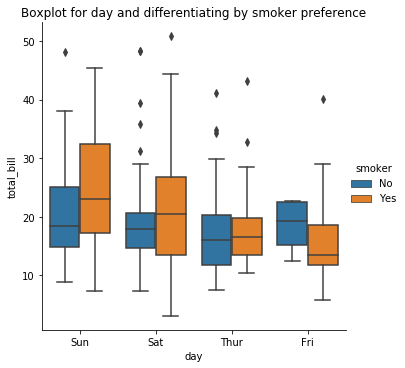

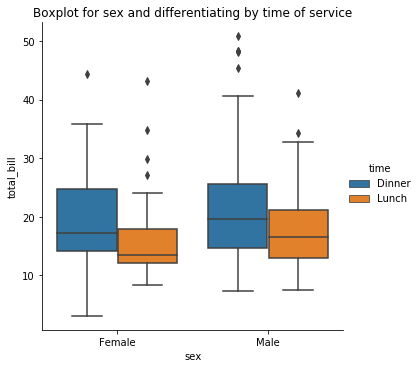

In [160]:
# Show skewness in 4 non-numerical sets of data, when plotted against total_bill

# Boxplot for day and differentiating by smoker
sns.catplot(x="day", y="total_bill", hue="smoker", kind = "box", data = tips_ds)

# Title and show plot
plt.title("Boxplot for day and differentiating by smoker preference")
plt.show()

# Boxplot for gender and differentiating by time
sns.catplot(x="sex", y="total_bill", hue="time", kind = "box", data = tips_ds)

# Title and show plot
plt.title("Boxplot for sex and differentiating by time of service")
plt.show()

From this data, we can determine visually that, on average, the smokers have larger bills on all days, bar Friday, and have a larger interquartile range of bill values on Saturday, and Sunday. Non-smokers, have a larger interquartile range on Thursdays, but on Friday it is too difficult to determine who has the larger interquartile range. However, non-smokers account for two of the largest three bills, but not the largest.

Likewise for the gender, men eating out for both lunch and dinner have a larger average bill and interquartile range. They also account for the largest 3 bills on the graph.

##### Selection of new criteria for analysis
Based on the above, certain regression analysis could be undertaken to determine how the impact of:

1) the time of service (lunch or dinner);

2) the seating preference (smoking or non-smoking) impacts the relationship between *total_bill* and *tip*.

Additionally, as we can see that the data is skewed, the dataset should be restricted to the values for *total_bill* that fall in the interquartile range (i.e. greater than or equal to the 25% quartile, and less than or equal to the 75% quartile. The other columns, namely *sex*, *size*, and *day* will be dropped from the dataset, for efficiency purposes.


In [161]:
# Drop additional columns, and filter by values in the interquartile range for total_bill

# Drop columns
drop_tips_ds = tips_ds.drop(columns=["size","sex","day"])

# Lower and upper bounds of interquartile range
q1 = tips_ds["total_bill"].quantile(.25)
q3 = tips_ds["total_bill"].quantile(.75)

# New dataframe based on filtering for interquartile range
new_tips_ds = drop_tips_ds.loc[(drop_tips_ds["total_bill"] >= q1) & (drop_tips_ds["total_bill"] <= q3)]

# Shape of new dataframe
print("New dataframe shape")
print()
print("Rows Columns")
print(new_tips_ds.shape)

New dataframe shape

Rows Columns
(122, 4)


##### New data set descriptions
Running the descriptive statistics again on the new dataset we get the following results.

In [162]:
# New data set descriptive statistics

print("Desciptions of the new data set")
print()
print(new_tips_ds.describe())
print("-----------------------")
print("Skewness of new data set")
print()
print(new_tips_ds.skew())
print("-----------------------")
print("Kurtosis of new data set")
print()
print(new_tips_ds.kurt())
print("-----------------------")
print("Correlation of new data set")
# Create new dataframe for the correlation coefficient values
new_corr_ds = new_tips_ds.corr(method="pearson")

# As each column will be perfectly correlated with itself, there is no need to show these values
# Replace the values of 1 with a blank value
new_corr_ds = new_corr_ds.replace({1.00000: ""})
print()
print(new_corr_ds)

Desciptions of the new data set

       total_bill         tip
count  122.000000  122.000000
mean    18.058607    2.917459
std      2.939714    0.893107
min     13.370000    1.010000
25%     15.845000    2.185000
50%     17.795000    3.000000
75%     20.410000    3.495000
max     24.080000    6.500000
-----------------------
Skewness of new data set

total_bill    0.320136
tip           0.767892
dtype: float64
-----------------------
Kurtosis of new data set

total_bill   -0.857452
tip           1.621318
dtype: float64
-----------------------
Correlation of new data set

           total_bill       tip
total_bill             0.421476
tip          0.421476          


##### Discussion of new data set
Before we continue with the regression analysis, and determining the lines of best fit for both options, it is necessary to review the changes in the new sample set of data, as compared to the whole data set.

Looking in reverse order, at the correlation first, we can see that the correlation between the *total_bill* and *tip* values has dropped by about a third (0.676 -> 0.421). This indicates that even though there is still a positive correlation between these two sets of data, the correlation has weekend from strong/very strong to slightly weaker than strong. 

The skewness and kurtosis of the set has also changed. The skewness of the *total_bill* has reduced by about three-quarters (1.133 -> 0.320), and is now near symmetric (i.e. between -0.5 and 0.5). The skewness for the *tip*s has also reduced by about half (1.465 > 0.768), however, it is still asymmetric. The kurtosis values show significantly more swing than the skewness. The *total_bill* value has swung by 170%, and from positive to negative (1.218 -> -0.857). This indicates that the tails of the data set are heavy with data, and the peak of the data is smooth and gently sloping. The kurtosis for *tips* shows that it has decreased by about four sevenths (3.648 -> 1.621). This value indicates that the peak of the data is still quite sharp, although not as sharp as previously. The graph has been plotted below for both *total_bill* and *tip* sets of data from the new dataset.

The data set has reduced in size from 244 to 122 points. This is as expected, as the interquartile range covers exactly 50% of the data points within a data set. The 50% quartile, or median value has stayed the same for both sets of data. However the previous 25% and 75% quartile values have now become the minima and maxima for the data sets. The mean has also decreased for both sets of data, dropping by about 10% for *total_bill* (19.786 -> 18.059), but only 2.7% for the *tip* data (2.998 -> 2.917). In addition, the values for mean and median are now very close to each other, for both sets of data (*total_bill*: mean = 18.059, median = 17.795; *tip*: mean = 2.917, median = 3.000).

Even though the standard deviation has been recorded for both the original and new datasets, it is not relevant, as neither dataset could be described as normally distributed. Therefore it is ignored here.

A look below shows the distribution plots for the new data set.


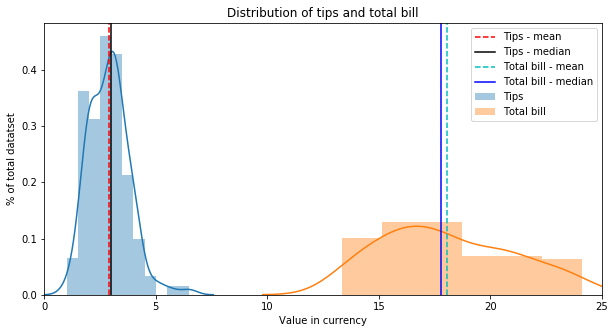

In [163]:
# Plot to show new data set, include mean and median

# Distribution plots for both tip and total_bill
sns.distplot(new_tips_ds["tip"], axlabel = False, label="Tips")
sns.distplot(new_tips_ds["total_bill"], axlabel = False, label="Total bill")

# Mean and median lines for tip and total_bill 
plt.axvline(new_tips_ds["tip"].mean(), color = 'r', linestyle = "--", label = "Tips - mean")
plt.axvline(new_tips_ds["tip"].median(), color = 'k', linestyle = "-", label = "Tips - median")
plt.axvline(new_tips_ds["total_bill"].mean(), color = 'c', linestyle = "--", label = "Total bill - mean")
plt.axvline(new_tips_ds["total_bill"].median(), color = 'b', linestyle = "-", label = "Total bill - median")

# Set length of x-axis
plt.xlim([0,25])

# Set size of plot area
plt.rcParams["figure.figsize"] = [10,5]

# Set title, labels, and legend for plot
plt.title("Distribution of tips and total bill")
plt.xlabel("Value in currency")
plt.ylabel("% of total datatset")
plt.legend()
plt.show()

##### General regression analysis for new data set

Moving on to the general regression analysis for the new data set, we can create a plot of the *total_bill* vs the *tip* values to see how they are clustered. 

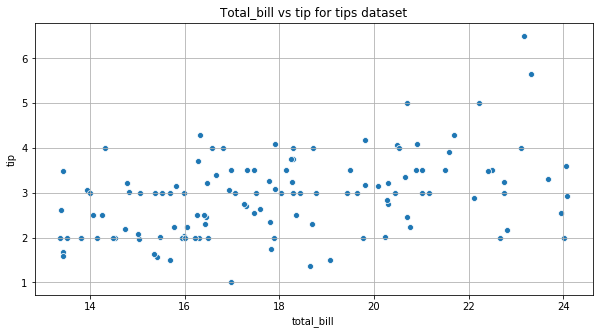

In [164]:
# Plot total_bill vs tip for the new dataset

# Create scatter plot diagram
sns.scatterplot(x="total_bill", y="tip", data=new_tips_ds)

# Set title and show plot
# Set title, gridlines, and show
plt.grid(axis="both")
plt.title("Total_bill vs tip for tips dataset")
plt.show()

Using the *regplot()* and *polyfit()* functions, as above, we get the following plot best fit lines of regression.

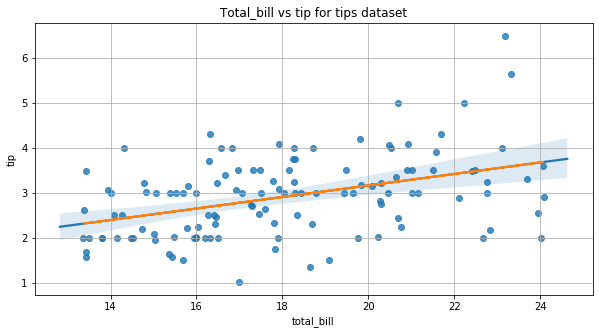

In [165]:
# Plotting th ebest fit lines of regression using regplot and polyfit

# Create the best fit line using regplot
sns.regplot(x="total_bill", y="tip", data=new_tips_ds, label = "regplot")

# Create the polyfit best fit line
# This method is borrowed from Chubarov (2017)

# Create X and Y values
xs = new_tips_ds["total_bill"]
ys = new_tips_ds["tip"]

# Create trendline using polyfit
new_trend = np.polyfit(xs,ys,1)

# Plot the trendline
trendpoly = np.poly1d(new_trend) 
plt.plot(xs,trendpoly(xs), label = "polyfit")

# Set title and show plot
plt.grid(axis="both")
plt.title("Total_bill vs tip for tips dataset")
plt.show()

Once again, there is not difference between the two methods of determining the best fit line of regression. As previously, using the *polyfit()* function, it is possible to determine the formula for the regression line. This can be combined with the previous test to extrapolate values for the *tip* based on the *total_bill* amount, giving the following information.

In [166]:
# Print line of regression formula using polyfit

# Take the values of m and c from the trend calculated previously
m, c = new_trend

# Input the values for m and c into the formula of the ine
print("Formula for regression line is:")
print()
print("y = %0.4fx + %0.4f" % (m, c))

# Examples of regression using formula of regression line

print("Extrapolation of tips (y) from table bill amounts (x)")
print()

# Using 4 values of x
x = 9.00
y = m*x + c
print("For x: %2.2f, the value of y is: %5.2f" % (x, y))

x = 32.40
y = m*x + c
print("For x: %2.2f, the value of y is: %2.2f" % (x, y))

x = 18.45
y = m*x + c
print("For x: %2.2f, the value of y is: %2.2f" % (x, y))

x = 75.20
y = m*x + c
print("For x: %2.2f, the value of y is: %2.2f" % (x, y))

Formula for regression line is:

y = 0.1280x + 0.6051
Extrapolation of tips (y) from table bill amounts (x)

For x: 9.00, the value of y is:  1.76
For x: 32.40, the value of y is: 4.75
For x: 18.45, the value of y is: 2.97
For x: 75.20, the value of y is: 10.23


The new formula shows that the slope of the new regression line has increased in gradient compared to the full data set (0.1050 -> 0.1280). The independent co-effiecient (c) has decreased by about a third (0.9203 -> 0.6051). This indicates that there is a greater positive relationship between the *total_bill* values and the *tip* values in the new data set. Additionally, in this data set, the ti left by the client is likely to be a higher percentage of the bill’s vaue than in the main dataset.

Looking at the selected 4 case values for the bill, with the exception of the first point (9.00), which is lower, all the other tip values are projected to be higher. It should be cautioned that the final two bill values are outside of the range of the values in the new dataset, and may not be extrapolated correctly. The reason for the first data point for the tip being lower is probably due to the reduced value of “c”.
